# Open Exploration

This file includes the code used to perform global sensitivity analysis for the RfR model

## Global Sensitivity Analysis

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome,
                           perform_experiments, ema_logging,Policy)

from ema_workbench import Samplers

from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

from SALib.analyze import sobol


from problem_formulation import get_model_for_problem_formulation

from dike_model_function import DikeNetwork  # @UnresolvedImport


from ema_workbench import (Model, CategoricalParameter,ScalarOutcome, IntegerParameter, RealParameter,
                           MultiprocessingEvaluator, ema_logging, Constant, Policy, Scenario,
                           perform_experiments, SequentialEvaluator,Constraint)

In [16]:
#running the model through EMA workbench
ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3) 


In [7]:
len(dike_model.uncertainties)

19

Running the experiments with Sobol Sampling

In [24]:
#Running experiments with sobol samples
with SequentialEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=320, policies=1, uncertainty_sampling=Samplers.SOBOL)

#Adding outcomes to experiments dataframe
for keys in outcomes.keys():
    experiments[keys] = outcomes[keys]
    
#Saving sobol outcomes to csv file
experiments.to_csv("output_data/outcomes_sobol.csv")

C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\SALib\sample\saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (320) is equal to `2^n`.
        
  warnings.warn(msg)
[MainProcess/INFO] performing 12800 scenarios * 1 policies * 1 model(s) = 12800 experiments
100%|██████████████████████████████████| 12800/12800 [6:37:52<00:00,  1.87s/it]
[MainProcess/INFO] experiments finished


In [10]:
#Reading experiments from csv file
experiments = pd.read_csv('output_data/outcomes_sobol.csv')

In [9]:
# Print keys from experiments
experiments.keys()

Index(['Unnamed: 0', 'A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate',
       'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax',
       'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail',
       'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0',
       'discount rate 1', 'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2',
       '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2',
       '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model',
       'A.1_Expected Annual Damage', 'A.1_Dike Investment Costs',
       'A

In [11]:
# Define the total expected annual damage as the sum of damages of all locations
experiments['Total Expected Annual Damage'] = experiments['A.1_Expected Annual Damage'] + experiments['A.2_Expected Annual Damage'] + experiments['A.3_Expected Annual Damage'] + experiments['A.4_Expected Annual Damage'] + experiments['A.5_Expected Annual Damage']

In [12]:
# Define the total expected number of deaths as the sum of deaths of all locations
experiments['Total Expected Number of Deaths'] = experiments['A.1_Expected Number of Deaths'] + experiments['A.2_Expected Number of Deaths'] + experiments['A.3_Expected Number of Deaths'] + experiments['A.4_Expected Number of Deaths'] + experiments['A.5_Expected Number of Deaths']

## Gorssel

The analysis is first performed for the objectives of Gorssel

### Sobol

In [17]:
# Defining problem for sobol
problem = get_SALib_problem(dike_model.uncertainties)
print(problem)

{'num_vars': 19, 'names': ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2'], 'bounds': [(0, 133), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (0, 4), (0, 4), (0, 4)]}


In [35]:
# Define outcomes of interest for Gorssel
outcomes_of_interest = ['A.4_Expected Annual Damage', 'A.4_Expected Number of Deaths', 'Expected Evacuation Costs']

                               ST   ST_conf
A.0_ID flood wave shape  0.007820  0.010148
A.1_Bmax                 0.000000  0.000000
A.1_Brate                0.000000  0.000000
A.1_pfail                0.000231  0.000600
A.2_Bmax                 0.000000  0.000000
A.2_Brate                0.000000  0.000000
A.2_pfail                0.033461  0.068669
A.3_Bmax                 0.000000  0.000000
A.3_Brate                0.000000  0.000000
A.3_pfail                0.000000  0.000000
A.4_Bmax                 0.000000  0.000000
A.4_Brate                0.000000  0.000000
A.4_pfail                1.343967  1.035317
A.5_Bmax                 0.000000  0.000000
A.5_Brate                0.000000  0.000000
A.5_pfail                0.000000  0.000000
discount rate 0          0.023437  0.020384
discount rate 1          0.000149  0.000301
discount rate 2          0.000000  0.000000
                               S1   S1_conf
A.0_ID flood wave shape  0.002221  0.003078
A.1_Bmax                 0.00000

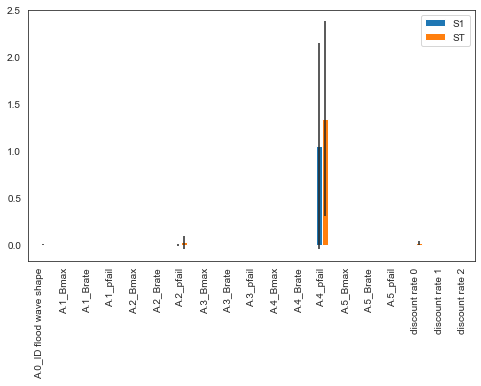

In [17]:
#Sobol analysis for first outcome of interest and plotting the results in different types of graphs
Si = sobol.analyze(problem, experiments[outcomes_of_interest[0]].to_numpy(), calc_second_order=True, print_to_console=True)

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [18]:
# Sobol indices for first outcome of interest
indices

,S1,ST
A.0_ID flood wave shape,0.002221,0.007820
A.1_Bmax,0.000000,0.000000
A.1_Brate,0.000000,0.000000
A.1_pfail,-0.000193,0.000231
A.2_Bmax,0.000000,0.000000
A.2_Brate,0.000000,0.000000
A.2_pfail,0.002116,0.033461
A.3_Bmax,0.000000,0.000000
A.3_Brate,0.000000,0.000000
A.3_pfail,0.000000,0.000000


                               ST   ST_conf
A.0_ID flood wave shape  0.009411  0.009867
A.1_Bmax                 0.000000  0.000000
A.1_Brate                0.000000  0.000000
A.1_pfail                0.000601  0.001755
A.2_Bmax                 0.000000  0.000000
A.2_Brate                0.000000  0.000000
A.2_pfail                0.033106  0.046372
A.3_Bmax                 0.000000  0.000000
A.3_Brate                0.000000  0.000000
A.3_pfail                0.000000  0.000000
A.4_Bmax                 0.000000  0.000000
A.4_Brate                0.000000  0.000000
A.4_pfail                1.058313  0.246091
A.5_Bmax                 0.000000  0.000000
A.5_Brate                0.000000  0.000000
A.5_pfail                0.000000  0.000000
discount rate 0          0.000000  0.000000
discount rate 1          0.000000  0.000000
discount rate 2          0.000000  0.000000
                               S1   S1_conf
A.0_ID flood wave shape  0.002673  0.002719
A.1_Bmax                 0.00000

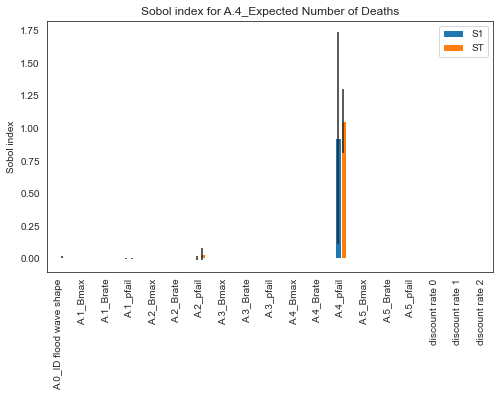

                               S1        ST
A.0_ID flood wave shape  0.002673  0.009411
A.1_Bmax                 0.000000  0.000000
A.1_Brate                0.000000  0.000000
A.1_pfail               -0.000315  0.000601
A.2_Bmax                 0.000000  0.000000
A.2_Brate                0.000000  0.000000
A.2_pfail                0.005564  0.033106
A.3_Bmax                 0.000000  0.000000
A.3_Brate                0.000000  0.000000
A.3_pfail                0.000000  0.000000
A.4_Bmax                 0.000000  0.000000
A.4_Brate                0.000000  0.000000
A.4_pfail                0.922633  1.058313
A.5_Bmax                 0.000000  0.000000
A.5_Brate                0.000000  0.000000
A.5_pfail                0.000000  0.000000
discount rate 0          0.000000  0.000000
discount rate 1          0.000000  0.000000
discount rate 2          0.000000  0.000000


In [19]:
#Sobol analysis for second outcome of interest and plotting the results in different types of graphs
Si = sobol.analyze(problem, experiments[outcomes_of_interest[1]].to_numpy(), calc_second_order=True, print_to_console=True)

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.title("Sobol index for A.4_Expected Number of Deaths")
plt.ylabel('Sobol index') 
plt.show()

print(indices)

fig.savefig('sobol_deaths.png', dpi=fig.dpi)

                                   ST       ST_conf
A.0_ID flood wave shape  9.561381e-03  1.003554e-02
A.1_Bmax                 4.137423e-05  1.009289e-04
A.1_Brate                0.000000e+00  0.000000e+00
A.1_pfail                4.964108e-02  6.264276e-02
A.2_Bmax                 3.304703e-07  7.118129e-07
A.2_Brate                5.847580e-06  1.259533e-05
A.2_pfail                9.544606e-01  1.153380e-01
A.3_Bmax                 0.000000e+00  0.000000e+00
A.3_Brate                0.000000e+00  0.000000e+00
A.3_pfail                6.751805e-06  1.370580e-05
A.4_Bmax                 0.000000e+00  0.000000e+00
A.4_Brate                0.000000e+00  0.000000e+00
A.4_pfail                6.529298e-04  6.238335e-04
A.5_Bmax                 0.000000e+00  0.000000e+00
A.5_Brate                0.000000e+00  0.000000e+00
A.5_pfail                8.102247e-04  1.134420e-03
discount rate 0          0.000000e+00  0.000000e+00
discount rate 1          0.000000e+00  0.000000e+00
discount rat

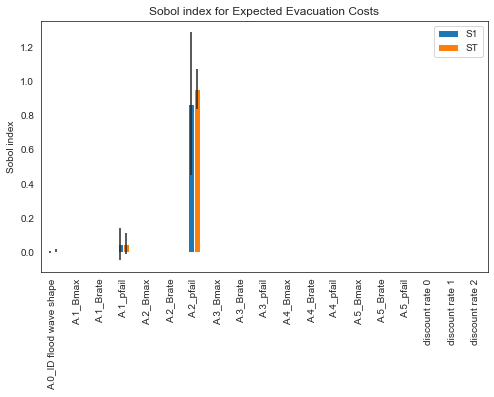

                               S1            ST
A.0_ID flood wave shape  0.000427  9.561381e-03
A.1_Bmax                -0.000131  4.137423e-05
A.1_Brate                0.000000  0.000000e+00
A.1_pfail                0.046614  4.964108e-02
A.2_Bmax                -0.000007  3.304703e-07
A.2_Brate                0.000030  5.847580e-06
A.2_pfail                0.868576  9.544606e-01
A.3_Bmax                 0.000000  0.000000e+00
A.3_Brate                0.000000  0.000000e+00
A.3_pfail               -0.000053  6.751805e-06
A.4_Bmax                 0.000000  0.000000e+00
A.4_Brate                0.000000  0.000000e+00
A.4_pfail                0.001966  6.529298e-04
A.5_Bmax                 0.000000  0.000000e+00
A.5_Brate                0.000000  0.000000e+00
A.5_pfail                0.000141  8.102247e-04
discount rate 0          0.000000  0.000000e+00
discount rate 1          0.000000  0.000000e+00
discount rate 2          0.000000  0.000000e+00


In [21]:
#Sobol analysis for third outcome of interest and plotting the results in different types of graphs
Si = sobol.analyze(problem, experiments[outcomes_of_interest[2]].to_numpy(), calc_second_order=True, print_to_console=True)

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.title("Sobol index for Expected Evacuation Costs")
plt.ylabel('Sobol index') 
plt.show()

print(indices)

fig.savefig('sobol_evacuation.png', dpi=fig.dpi)

Further code for non used methods

In [42]:
#Getting the total index for the uncertainties
Y = outcomes[outcomes_of_interest[4]]

s_data = pd.DataFrame(index=problem['names'],
                      columns=np.arange(20,n_exp,50)*(2*problem['num_vars']+2))
for j in s_data.columns:
    scores = sobol.analyze(problem, Y[0:j], calc_second_order=True, print_to_console=False)
    s_data.loc[:,j] = scores['ST']

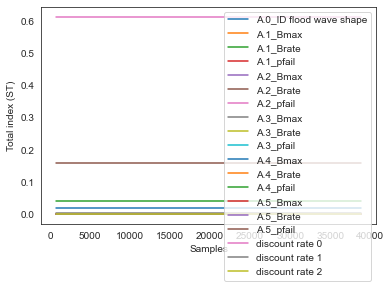

In [43]:
#Plotting total sobol indexes
fig, ax = plt.subplots(1)

s_data.T.plot(ax=ax)
ax.set_xlabel('Samples')
ax.set_ylabel('Total index (ST)')
plt.show()

### Random Forest Extra Forest

In [53]:
# Reading in experiments and outcomes from run 
experiments_tree = pd.read_csv('output_data/df_experiments_s1000_p10.csv')
outcomes_tree = pd.read_csv('output_data/df_outcomes_s1000_p10.csv')

In [54]:
# Defining the total damages and deaths as the sum of all location
outcomes_tree['Total Expected Annual Damage'] = outcomes_tree['A.1_Expected Annual Damage'] + outcomes_tree['A.2_Expected Annual Damage'] + outcomes_tree['A.3_Expected Annual Damage'] + outcomes_tree['A.4_Expected Annual Damage'] + outcomes_tree['A.5_Expected Annual Damage']
outcomes_tree['Total Expected Number of Deaths'] = outcomes_tree['A.1_Expected Number of Deaths'] + outcomes_tree['A.2_Expected Number of Deaths'] + outcomes_tree['A.3_Expected Number of Deaths'] + outcomes_tree['A.4_Expected Number of Deaths'] + outcomes_tree['A.5_Expected Number of Deaths']

In [29]:
outcomes_tree

,Unnamed: 0,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,0,0.000000e+00,1.105736e+08,0.000000,1.075564e+07,2.059790e+08,0.002289,0.000000e+00,6.911389e+07,0.000000,0.000000,5.092648e+07,0.000000,0.0,2.015526e+08,0.0,935800000.0,699.603995
1,1,0.000000e+00,1.105736e+08,0.000000,1.768341e+08,2.059790e+08,0.033865,0.000000e+00,6.911389e+07,0.000000,0.000000,5.092648e+07,0.000000,0.0,2.015526e+08,0.0,935800000.0,12069.428853
2,2,0.000000e+00,1.105736e+08,0.000000,3.051443e+07,2.059790e+08,0.006264,6.857413e+06,6.911389e+07,0.002293,0.000000,5.092648e+07,0.000000,0.0,2.015526e+08,0.0,935800000.0,2303.351644
3,3,0.000000e+00,1.105736e+08,0.000000,1.309610e+07,2.059790e+08,0.001826,4.610649e+07,6.911389e+07,0.010180,0.000000,5.092648e+07,0.000000,0.0,2.015526e+08,0.0,935800000.0,1891.226906
4,4,0.000000e+00,1.105736e+08,0.000000,6.869667e+07,2.059790e+08,0.007141,3.814550e+06,6.911389e+07,0.001031,0.000000,5.092648e+07,0.000000,0.0,2.015526e+08,0.0,935800000.0,2401.776247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,3.093545e+06,6.650701e+07,0.000366,0.000000e+00,2.354086e+08,0.000000,0.000000e+00,1.437793e+08,0.000000,0.000000,4.275558e+07,0.000000,0.0,1.433328e+08,0.0,991100000.0,54.563445
9996,9996,1.106546e+07,6.650701e+07,0.001039,0.000000e+00,2.354086e+08,0.000000,0.000000e+00,1.437793e+08,0.000000,0.000000,4.275558e+07,0.000000,0.0,1.433328e+08,0.0,991100000.0,178.758766
9997,9997,0.000000e+00,6.650701e+07,0.000000,0.000000e+00,2.354086e+08,0.000000,0.000000e+00,1.437793e+08,0.000000,489854.336235,4.275558e+07,0.000029,0.0,1.433328e+08,0.0,991100000.0,39.519762
9998,9998,1.818283e+08,6.650701e+07,0.014109,0.000000e+00,2.354086e+08,0.000000,0.000000e+00,1.437793e+08,0.000000,0.000000,4.275558e+07,0.000000,0.0,1.433328e+08,0.0,991100000.0,2439.067861


In [60]:
# Getting the total features scores of the uncertainties for the objectives of Gorssel
scores = feature_scoring.get_ex_feature_scores(experiments_tree[experiment_columns], outcomes_tree[['A.4_Expected Annual Damage',
 'A.4_Expected Number of Deaths']],max_features=0.6, mode=RuleInductionType.REGRESSION)[0]
scores

,1
0,
A.4_pfail,0.632813
discount rate 2,0.028846
A.3_pfail,0.028725
A.5_pfail,0.024848
A.3_Bmax,0.023191
A.1_Bmax,0.022865
discount rate 0,0.022318
A.0_ID flood wave shape,0.021770
A.1_pfail,0.021244


In [67]:
# Calculating the feature scores for different number of samples
combined_scores = []
for j in range(100, experiments_tree.shape[0], 100):
    scores = feature_scoring.get_ex_feature_scores(experiments_tree.iloc[0:j, :],
                                                   outcomes_tree[['A.4_Expected Annual Damage','A.4_Expected Number of Deaths']][0:j],
                                                   max_features=0.6,
                                                   mode=RuleInductionType.REGRESSION)[0]
    scores.columns = [j]
    combined_scores.append(scores)

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a si

In [68]:
# Adding all combined scores to the same dataframe
combined_scores = pd.concat(combined_scores, axis=1, sort=True)

In [30]:
# Defining the uncertainty and policy columns 
experiment_columns = ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2'] 

policy_columns = ['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat',]

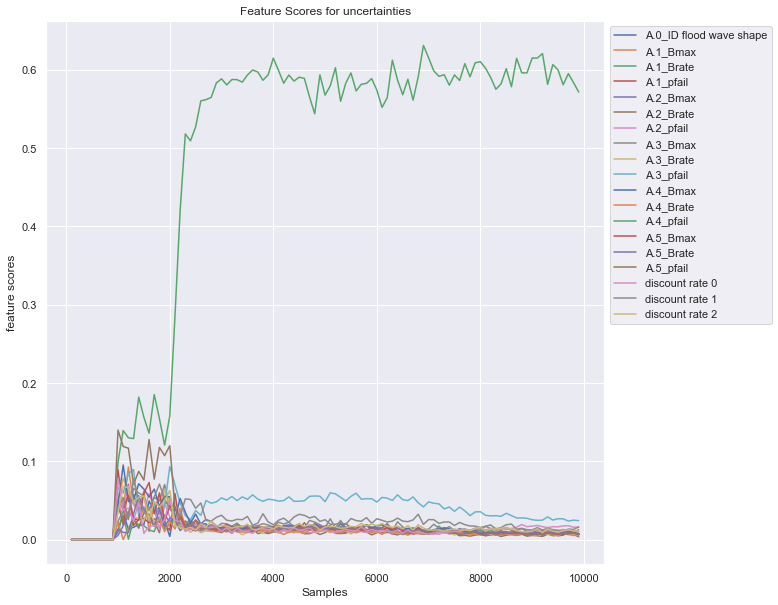

In [69]:
# Plotting the found features scores for different number of samples
fig, ax = plt.subplots(1)

combined_scores.T[experiment_columns].plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Samples')
ax.set_ylabel('feature scores')
plt.title('Feature Scores for uncertainties')
plt.show()

fig.savefig('extra_trees_gorssel_convergence.png', dpi=fig.dpi, bbox_inches='tight')


            

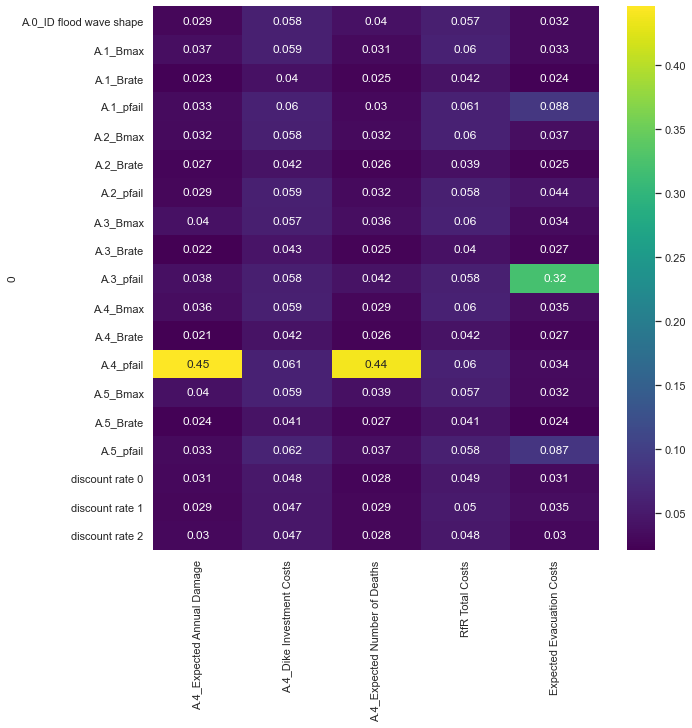

In [19]:
# Plotting feature scores disaggregated over the different outcomes of interest
fs = feature_scoring.get_feature_scores_all(experiments_tree[experiment_columns], outcomes_tree[outcomes_of_interest])

sns.set(rc = {'figure.figsize':(10,10)})
svm=sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()
figure = svm.get_figure()    
figure.savefig('svm_conf.png', dpi=400, bbox_inches='tight')

## Overall aggregated over place

Here the same analysis is performed, but for the outcomes of interest for Rijkswaterstaat and thus on a more regional level.

### Sobol

In [43]:
# Defining outcomes of interest for regional perspective
outcomes_of_interest_overall = ['Total Expected Number of Deaths', 'Total Expected Annual Damage']

                                   ST       ST_conf
A.0_ID flood wave shape  6.126471e-03  6.783245e-03
A.1_Bmax                 3.272438e-05  6.800505e-05
A.1_Brate                0.000000e+00  0.000000e+00
A.1_pfail                4.616901e-01  3.771135e-01
A.2_Bmax                 3.004897e-07  7.413483e-07
A.2_Brate                2.789476e-06  6.882011e-06
A.2_pfail                5.589702e-01  3.727244e-01
A.3_Bmax                 0.000000e+00  0.000000e+00
A.3_Brate                0.000000e+00  0.000000e+00
A.3_pfail                3.052917e-05  7.505801e-05
A.4_Bmax                 0.000000e+00  0.000000e+00
A.4_Brate                0.000000e+00  0.000000e+00
A.4_pfail                5.528569e-05  6.188715e-05
A.5_Bmax                 0.000000e+00  0.000000e+00
A.5_Brate                0.000000e+00  0.000000e+00
A.5_pfail                4.150573e-04  6.980837e-04
discount rate 0          0.000000e+00  0.000000e+00
discount rate 1          0.000000e+00  0.000000e+00
discount rat

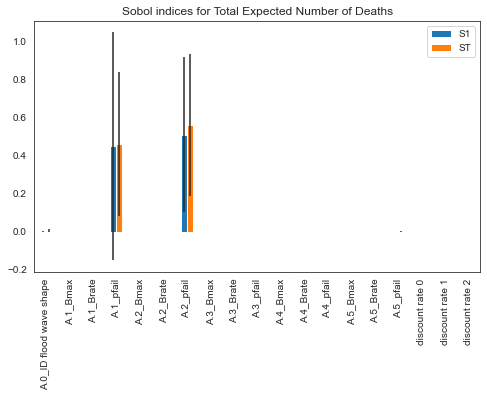

In [20]:
# Calculate sobol indices for first outcome of interest
Si = sobol.analyze(problem, experiments[outcomes_of_interest_overall[0]].to_numpy(), calc_second_order=True, print_to_console=True)

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.title('Sobol indices for Total Expected Number of Deaths')
plt.savefig('sobol_total_deaths.png')
plt.show()

In [21]:
# Show the values of the sobol indices
indices

,S1,ST
A.0_ID flood wave shape,0.000342,6.126471e-03
A.1_Bmax,-0.000108,3.272438e-05
A.1_Brate,0.000000,0.000000e+00
A.1_pfail,0.449096,4.616901e-01
A.2_Bmax,-0.000006,3.004897e-07
A.2_Brate,0.000019,2.789476e-06
A.2_pfail,0.510358,5.589702e-01
A.3_Bmax,0.000000,0.000000e+00
A.3_Brate,0.000000,0.000000e+00
A.3_pfail,-0.000103,3.052917e-05


                                   ST       ST_conf
A.0_ID flood wave shape  6.709164e-03  6.393536e-03
A.1_Bmax                 4.105654e-05  8.320975e-05
A.1_Brate                0.000000e+00  0.000000e+00
A.1_pfail                6.048090e-01  4.637180e-01
A.2_Bmax                 8.333225e-08  2.029595e-07
A.2_Brate                9.814445e-07  2.390353e-06
A.2_pfail                4.745913e-01  3.321457e-01
A.3_Bmax                 0.000000e+00  0.000000e+00
A.3_Brate                0.000000e+00  0.000000e+00
A.3_pfail                5.989690e-06  1.518047e-05
A.4_Bmax                 0.000000e+00  0.000000e+00
A.4_Brate                0.000000e+00  0.000000e+00
A.4_pfail                2.261074e-04  3.006096e-04
A.5_Bmax                 0.000000e+00  0.000000e+00
A.5_Brate                0.000000e+00  0.000000e+00
A.5_pfail                2.033878e-04  3.134438e-04
discount rate 0          5.695788e-02  3.687317e-02
discount rate 1          4.892600e-07  1.016392e-06
discount rat

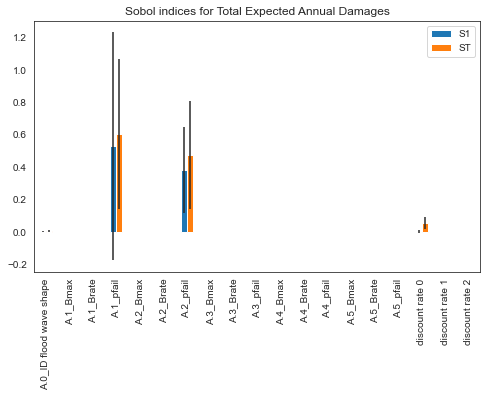

In [25]:
# Calculate sobol indices for second outcome of interest
Si = sobol.analyze(problem, experiments[outcomes_of_interest_overall[1]].to_numpy(), calc_second_order=True, print_to_console=True)

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.title('Sobol indices for Total Expected Annual Damages')
plt.savefig('sobol_total_damages.png')
plt.show()

In [26]:
# Show the values of the sobol indices
indices

,S1,ST
A.0_ID flood wave shape,0.001075,6.709164e-03
A.1_Bmax,-0.000114,4.105654e-05
A.1_Brate,0.000000,0.000000e+00
A.1_pfail,0.528609,6.048090e-01
A.2_Bmax,-0.000005,8.333225e-08
A.2_Brate,0.000016,9.814445e-07
A.2_pfail,0.384048,4.745913e-01
A.3_Bmax,0.000000,0.000000e+00
A.3_Brate,0.000000,0.000000e+00
A.3_pfail,-0.000047,5.989690e-06


### Extra Trees Random Forest

In [64]:
# Calculate combined features scores for the outcomes of interest on a regional level
scores = feature_scoring.get_ex_feature_scores(experiments_tree[experiment_columns], outcomes_tree[outcomes_of_interest_overall+['Expected Evacuation Costs']],
                                      max_features=0.6, mode=RuleInductionType.REGRESSION)[0]
scores

,1
0,
A.1_pfail,0.267636
A.3_pfail,0.226969
A.2_pfail,0.055735
A.5_pfail,0.045585
discount rate 1,0.035771
discount rate 0,0.035132
A.2_Bmax,0.029940
A.3_Bmax,0.029743
A.4_pfail,0.027528


In [70]:
#Calculate feature scores for different number of samples
combined_scores = []
for j in range(100, experiments_tree.shape[0], 100):
    scores = feature_scoring.get_ex_feature_scores(experiments_tree.iloc[0:j, :],
                                                   outcomes_tree[outcomes_of_interest_overall+ ['Expected Evacuation Costs']][0:j],
                                                   max_features=0.6,
                                                   mode=RuleInductionType.REGRESSION)[0]
    scores.columns = [j]
    combined_scores.append(scores)

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a si

In [71]:
#Combine scores into dataframe
combined_scores = pd.concat(combined_scores, axis=1, sort=True)

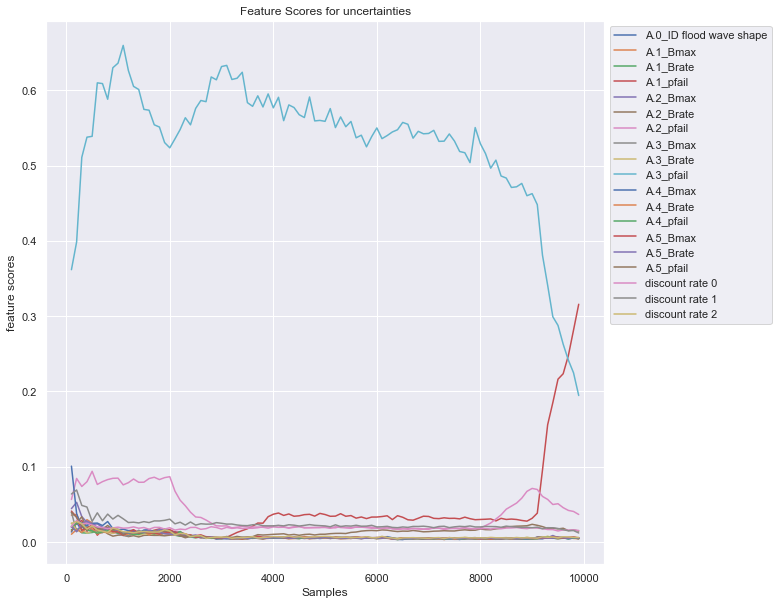

In [72]:
# Plot the feature scores for different number of samples
fig, ax = plt.subplots(1)

combined_scores.T[experiment_columns].plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Samples')
ax.set_ylabel('feature scores')
plt.title('Feature Scores for uncertainties')

fig.savefig('extra_trees_regional_convergence.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

     

In [50]:
# All of the outcomes of interest combined
all_of_interest = ['Total Expected Number of Deaths',
 'Total Expected Annual Damage',
 'A.4_Expected Annual Damage',
 'A.4_Expected Number of Deaths',
 'Expected Evacuation Costs']

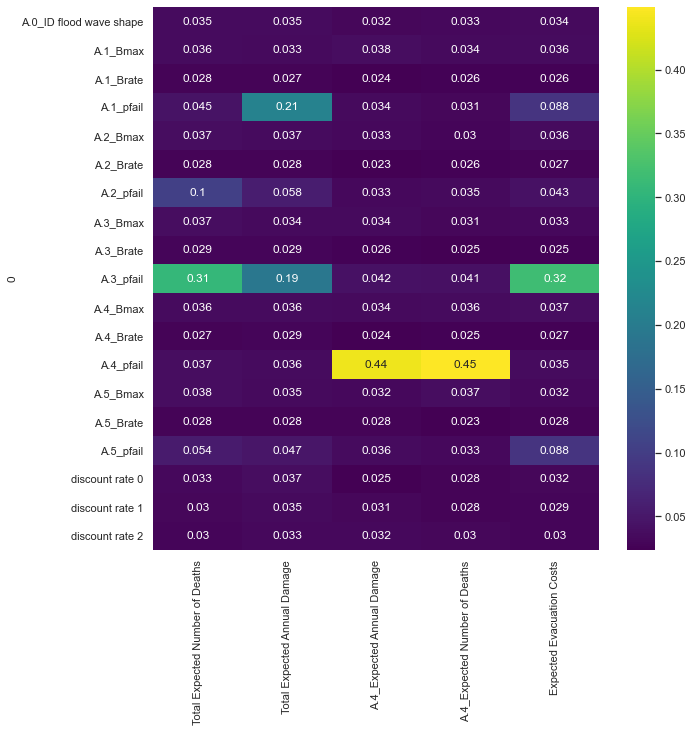

In [55]:
# Plot feature scores for all objectives of both gorssel and rijkswaterstaat
fs = feature_scoring.get_feature_scores_all(experiments_tree[experiment_columns], outcomes_tree[all_of_interest])

sns.set(rc = {'figure.figsize':(10,10)})
svm=sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()
figure = svm.get_figure()    
figure.savefig('svm_conf.png', dpi=400, bbox_inches='tight')